In [1]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from census import Census
from config import gkey

gmaps.configure(api_key=gkey)


In [2]:
# print(json.dumps(geo_data, indent=4, sort_keys=True))

In [3]:
file = "../Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

# pd.set_option("display.max_rows", 15)

# base_df.head()

In [62]:
total_sales = base_df.latestPrice.sum()
total_sales

7779199440

In [63]:
count_ofhomes = len(base_df)
count_ofhomes

15171

In [64]:
average_price = total_sales/count_ofhomes
average_price

512767.7437215741

In [4]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [5]:
total_schools = base_df[["city", "numOfPrimarySchools", "numOfElementarySchools", "numOfMiddleSchools", "numOfHighSchools"]]
total_schools.value_counts()

city              numOfPrimarySchools  numOfElementarySchools  numOfMiddleSchools  numOfHighSchools
austin            1                    0                       1                   1                   13447
                                                                                   2                     468
                  0                    1                       1                   1                     221
                                                               3                   0                     213
                  1                    0                       1                   0                     213
                  0                    1                       1                   0                     178
                                       0                       2                   0                     159
del valle         1                    0                       1                   1                      86
austin            0         

In [53]:
count_price_change = base_df[["latest_salemonth", "numPriceChanges"]]
count_price_change.value_counts()

latest_salemonth  numPriceChanges
6                 1                  587
7                 1                  542
5                 1                  533
4                 1                  500
8                 1                  464
                                    ... 
                  16                   1
                  17                   1
                  18                   1
10                14                   1
12                22                   1
Length: 201, dtype: int64

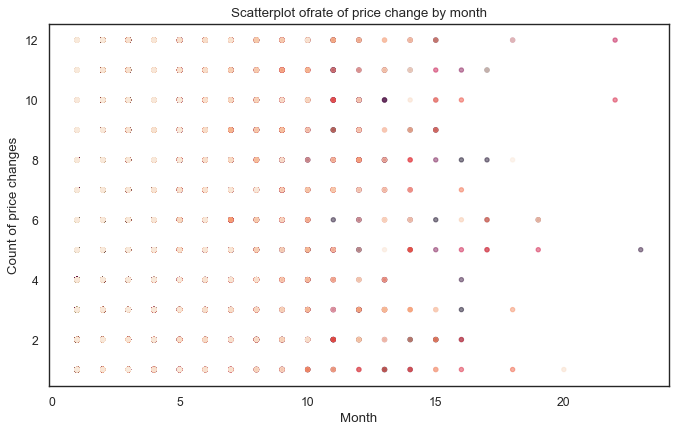

In [58]:

x = count_price_change["numPriceChanges"]
y = count_price_change["latest_salemonth"]
colors= range(count_price_change["latest_salemonth"].count())
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x, y, s=15, c=colors, alpha=0.5)
plt.xlabel("Month")
plt.ylabel("Count of price changes")
plt.title("Scatterplot ofrate of price change by month") 
plt.show()

In [61]:
base_df.homeType.value_counts()
# make bar chart of these values and then tell the story, becuase 
# of this slant in the data we focused only on single family homes.  then check single fmaily homes for outliers 
# this answers one of the questions 

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

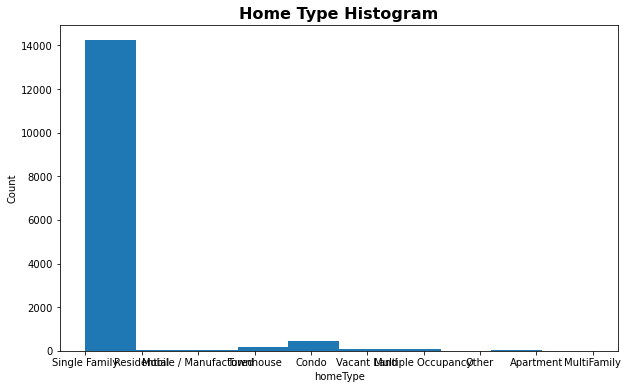

In [7]:
plt.figure(figsize= (10,6))
plt.hist(base_df.homeType)
plt.ylabel('Count')
plt.xlabel("homeType")
plt.title("Home Type Histogram", fontweight="bold", fontsize=16)
# plt.set_xtick(labels=base_df.homeType.unique(),rotation=90)
plt.show()


In [8]:
base_df.yearBuilt.sort_values(ascending =False) 
# research sort codes  play with this 

14802    2020
13910    2020
9475     2020
9829     2020
14852    2020
         ... 
12750    1907
9324     1907
9512     1907
9373     1906
12931    1905
Name: yearBuilt, Length: 15171, dtype: int64

In [9]:
#  base_df.describe()

# we should rule out the outliers, below is a breakout that shows some homes have 27 rooms and 20 bathrooms.  

In [10]:
# base_df.numOfBathrooms.value_counts()
base_df.numPriceChanges.value_counts()
# there are two entries with an unusual amount of bathrooms, one with 13 and one with 27, outliers that should be removed? 

1     5029
2     3345
3     2193
4     1557
5     1004
6      688
7      440
8      297
9      180
10     136
12      84
11      81
13      51
14      33
15      22
16      11
17       7
18       5
19       4
22       2
20       1
23       1
Name: numPriceChanges, dtype: int64

In [11]:
base_df.city.value_counts()
# same as above, due to data set 

austin              15020
del valle              86
pflugerville           36
driftwood              12
manor                   6
dripping springs        5
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [12]:
base_df.describe
base_df["numOfBathrooms"].max()



27.0

In [13]:
base_df

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\r\n\r\nBeautiful one story home ...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


In [14]:
mask = base_df.numOfBathrooms != 27.0
new1 = base_df[mask]
new1.numOfBathrooms

0        3.0
1        2.0
2        2.0
3        2.0
4        3.0
        ... 
15166    2.0
15167    4.0
15168    3.0
15169    2.0
15170    1.0
Name: numOfBathrooms, Length: 15170, dtype: float64

In [15]:
mask = base_df.lotSizeSqFt != 1508482800.0
new = base_df[mask]
new.numOfBathrooms

0        3.0
1        2.0
2        2.0
3        2.0
4        3.0
        ... 
15166    2.0
15167    4.0
15168    3.0
15169    2.0
15170    1.0
Name: numOfBathrooms, Length: 15170, dtype: float64

In [16]:
mask = new.numOfBathrooms != 27.0
new1 = new[mask]
new1.numOfBathrooms

0        3.0
1        2.0
2        2.0
3        2.0
4        3.0
        ... 
15166    2.0
15167    4.0
15168    3.0
15169    2.0
15170    1.0
Name: numOfBathrooms, Length: 15169, dtype: float64

In [17]:
mask = new1.homeType == "Single Family"
cleaned_data = new1[mask]
cleaned_data.homeType.value_counts()

Single Family    14239
Name: homeType, dtype: int64

In [18]:


avg_byzip = base_df[["zipcode", "latestPrice", "lotSizeSqFt",
                           "livingAreaSqFt", "numOfBedrooms", "numOfBathrooms"]]
avg_byzip.head()



,zipcode,latestPrice,lotSizeSqFt,livingAreaSqFt,numOfBedrooms,numOfBathrooms
0,78660,305000,6011.0,2601,4,3.0
1,78660,295000,6185.0,1768,4,2.0
2,78660,256125,7840.0,1478,3,2.0
3,78660,240000,6098.0,1678,3,2.0
4,78660,239900,6708.0,2132,3,3.0


In [19]:
#my attempt at getting the average price by zipcode 
zipgroup = avg_byzip.groupby(["zipcode"])

zip_copmarison = zipgroup.mean()
# zip_copmarison

In [20]:
cleaned_data['latest_saleyear'].unique()


array([2019, 2020, 2018, 2021], dtype=int64)

In [21]:
cleaned_data['latest_saledate'].max()

'9/9/2020'

In [22]:
cleaned_data['latest_saleyear'].unique()

array([2019, 2020, 2018, 2021], dtype=int64)

In [23]:
yearly_sales = cleaned_data['latest_saleyear'].value_counts()
yearly_sales

2020    5053
2019    4992
2018    4118
2021      76
Name: latest_saleyear, dtype: int64

In [24]:
avg_yearly_saleprice = cleaned_data.groupby("latest_saleyear").latestPrice.mean()
avg_yearly_saleprice

latest_saleyear
2018    490919.884167
2019    499518.539062
2020    551639.206412
2021    642727.960526
Name: latestPrice, dtype: float64

In [25]:
sns.set_theme(style="dark")

In [26]:
# base_df.violinplot("latestPrice", by="latest_saleyear", figsize=(20, 10))

# sns.violinplot(data=base_df, x="latest_saleyear", y="latestPrice", hue="smoker",
#                split=True, inner="quart", linewidth=1,
#                palette={"Yes": "b", "No": ".85"})
# sns.despine(left=True)

# ax = sns.violinplot(x="latest_saleyear", y="latestPrice", data=base_df)

In [27]:
# sns.relplot(data=base_df, x="lotSizeSqFt", y="latestPrice", hue="latest_saleyear")

In [28]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [29]:
# target_city = "Austin, Texas"

# target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}"
# target_url

In [30]:
# response = requests.get(target_url)

# geo_data = response.json()

# Print the json

In [31]:
# base_df.rename(columns={'latestPrice': 'Price'}, inplace=True)
len(cleaned_data[["latestPrice"]])

14239

In [32]:
city_latslong = cleaned_data[["latitude", "longitude", "latestPrice"]]
city_latslong

,latitude,longitude,latestPrice
0,30.430632,-97.663078,305000
1,30.432672,-97.661697,295000
2,30.409748,-97.639771,256125
3,30.432112,-97.661659,240000
4,30.437368,-97.656860,239900
...,...,...,...
15165,30.185915,-97.828415,280000
15166,30.161997,-97.816345,330000
15167,30.240223,-97.772835,550000
15168,30.244835,-97.761124,875000


In [33]:
#  def _render_map(self, initial_year):              

#         fig = gmaps.figure() 
#         self._marker_layer = gmaps.marker_layer([])
#     
#         self._heatmap = gmaps.heatmap_layer(self._locations_for_year(initial_year),
#                                             weights=self._weights_for_year(initial_year),
#                                             max_intensity=self._max_weights_for_year(initial_year),
#                                             point_radius=10)
#         fig.add_layer(self._heatmap)
#         fig.add_layer(self._marker_layer)
#         return fig

In [34]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [35]:
# markers = gmaps.marker_layer(city_latslong)
# # Add the layer to the map
# fig.add_layer(markers)
# fig

In [36]:
# len(city_latslong)

In [37]:
price = cleaned_data['latestPrice']
price

0        305000
1        295000
2        256125
3        240000
4        239900
          ...  
15165    280000
15166    330000
15167    550000
15168    875000
15170    374900
Name: latestPrice, Length: 14239, dtype: int64

In [38]:
from IPython.display import display
import ipywidgets as widgets

In [39]:
sqft_price = cleaned_data[["livingAreaSqFt", "latitude", 'longitude', "latestPrice"]]
sqft_price


,livingAreaSqFt,latitude,longitude,latestPrice
0,2601,30.430632,-97.663078,305000
1,1768,30.432672,-97.661697,295000
2,1478,30.409748,-97.639771,256125
3,1678,30.432112,-97.661659,240000
4,2132,30.437368,-97.656860,239900
...,...,...,...,...
15165,1420,30.185915,-97.828415,280000
15166,1234,30.161997,-97.816345,330000
15167,1888,30.240223,-97.772835,550000
15168,1524,30.244835,-97.761124,875000


In [40]:
locations = city_latslong[["latitude", "longitude"]]
fig = gmaps.figure(map_type='TERRAIN')
heatmap_layer = gmaps.heatmap_layer(locations, weights=cleaned_data['latestPrice']) 

fig.add_layer(heatmap_layer)
# fig.add_layer(gmaps.traffic_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# heatmap_layer.gradient = [
#     'white',
#     'teal',
#     'aqua'
# ]
heatmap_layer.point_radius = 25
# heatmap_layer.opacity = 0.0 # make the heatmap transparent

In [42]:
base_df.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [59]:
cleaned_data.rename(columns={'city': 'City', 'streetAddress' : 'Street Address', 'zipcode' : 'Zipcode' , 'description' : 'Description', 'latitude' : 'Latitude',
       'longitude' : 'Longitude', 'propertyTaxRate' : 'Property Tax Rate', 'garageSpaces' : 'Garage Spaces', 'hasAssociation' : 'Has HOA?',
       'hasCooling' : 'Has Cooling', 'hasGarage' : 'Has Garage', 'hasHeating' : 'Has Heating', 'hasSpa' : 'Spa', 'hasView' : 'View',
       'homeType' : 'Home Type', 'parkingSpaces' : '# of Parking Spaces', 'yearBuilt' : 'Year Built', 'latestPrice' : 'Latest Price',
       'numPriceChanges' : '# of Price Changes', 'latest_saledate' : 'Latest Sale Date', 'latest_salemonth' : 'Latest Sale Month',
       'latest_saleyear' :  'Latest Sale Year', 'latestPriceSource' : 'Price Source', 'numOfPhotos' : '# of Photos',
       'numOfAccessibilityFeatures' : '# of Accesbility Features', 'numOfAppliances' : '# of Appliances', 'numOfParkingFeatures' : '# of Parking Features',
       'numOfPatioAndPorchFeatures' : '# of Patio/Porch Features', 'numOfSecurityFeatures' : '# of Security Features', 'numOfWaterfrontFeatures' : '# of Waterfront Features', 'numOfWindowFeatures' : '# of Window Features',
       'numOfCommunityFeatures' : '# of Community Features', 'lotSizeSqFt' : 'Lot Size (SqFt)', 'livingAreaSqFt' : 'livingArea (SqFt)',
       'numOfPrimarySchools' : '# of Primary Schools', 'numOfElementarySchools' : '# of Elementary Schools', 'numOfMiddleSchools' : '# of Middle Schools',
       'numOfHighSchools' : '# of High Schools', 'avgSchoolDistance' : 'Avg School Distance', 'avgSchoolRating' : 'Avg School Rating',
       'avgSchoolSize' : 'Avg School Size', 'MedianStudentsPerTeacher' : 'Median Students Per Teacher', 'numOfBathrooms' : '# of Bathrooms',
       'numOfBedrooms' : '# of Bedrooms', 'numOfStories' : '# of Stories'}, inplace=True)
cleaned_data


C:\Users\arnol\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,zpid,City,Street Address,Zipcode,Description,Latitude,Longitude,Property Tax Rate,Garage Spaces,Has HOA?,...,# of Middle Schools,# of High Schools,Avg School Distance,Avg School Rating,Avg School Size,Median Students Per Teacher,# of Bathrooms,# of Bedrooms,# of Stories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\r\n\r\nBeautiful one story home ...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg


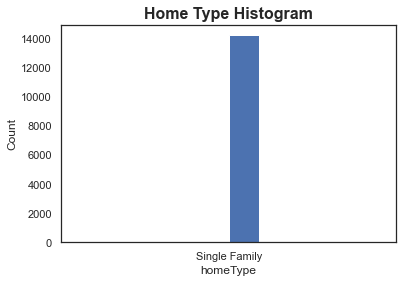

In [44]:
# plt.figure(figsize= (10,6))
plt.hist(cleaned_data.homeType)
plt.ylabel('Count')
plt.xlabel("homeType")
plt.title("Home Type Histogram", fontweight="bold", fontsize=16)
plt.show()

In [45]:
from IPython.display import display
import ipywidgets as widgets

class Interactive(object):
  

    def __init__(self, sqft_price):
        self._df = sqft_price
        self._heatmap = None
        self._slider = None
        min_sqft = min(self._df['livingAreaSqFt'])

        map_figure = self._render_map(min_sqft)
        controls = self._render_controls(min_sqft)
        self._container = widgets.VBox([title_widget, controls, map_figure])
        
        title_widget = widgets.HTML('<h3>Home Price by Square Footage</h3>''<h4>Data from The Austin Housing Project</a></h4>')

    def render(self):
        display(self._container)

    def _on_year_change(self, change):
        livingAreaSqFt = self._slider.value
        self._heatmap.locations = self._locations_for_year(livingAreaSqFt)
        self._total_box.value = self.total_price_from_sqft(livingAreaSqFt)
        return self._container

    def _render_map(self, min_sqft):
        fig = gmaps.figure(map_type='TERRAIN')
        self._heatmap = gmaps.heatmap_layer(self._locations_for_year(min_sqft),
            self._locations_for_year(min_sqft),
            max_intensity=100,
            point_radius=8
        )
        
        fig.add_layer(self._heatmap)
        return fig

    def _render_controls(self, min_sqft):
        self._slider = widgets.IntSlider(
            value=min_sqft,
            min=min(self._df['livingAreaSqFt']),
            max=max(self._df['livingAreaSqFt']),
            description='Living Area SqFt',
            continuous_update=False
        )
        self._total_box = widgets.Label(
            value=self.total_price_from_sqft(min_sqft)
        )
        self._slider.observe(self._on_year_change, names='value')
        controls = widgets.HBox(
            [self._slider, self._total_box],
            layout={'justify_content': 'space-between'}
        )
        return controls

    def _locations_for_year(self, livingAreaSqFt):
        return self._df[self._df['livingAreaSqFt'] == livingAreaSqFt][['latitude', 'longitude']]

    def _total_price_from_sqft(self, livingAreaSqFt):
        return int(self._df[self._df['livingAreaSqFt'] == livingAreaSqFt]['livingAreaSqFt'].count())

    def _total_price_from_sqft(self, livingAreaSqFt):
        return '{} civilian casualties'.format(self.total_price_from_sqft(livingAreaSqFt))
    


Interactive(sqft_price).render()

TraitError: latitude is not a valid weight. Weights must be floats